In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Problem 1 - Data Read, Write and Inspect:
Dataset: Bank.csv

In [78]:
bankDf = pd.read_csv('/content/drive/MyDrive/Concepts and Technologies of AI/Bank.csv')

In [79]:
bankDf.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [80]:
bankDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [81]:
column = bankDf.select_dtypes(include='object').columns
column

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [82]:
for col in column:
  print("Unique Column: ")
  print( bankDf[col].unique())

Unique Column: 
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Unique Column: 
['married' 'single' 'divorced']
Unique Column: 
['tertiary' 'secondary' 'unknown' 'primary']
Unique Column: 
['no' 'yes']
Unique Column: 
['yes' 'no']
Unique Column: 
['no' 'yes']
Unique Column: 
['unknown' 'cellular' 'telephone']
Unique Column: 
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique Column: 
['unknown' 'failure' 'other' 'success']
Unique Column: 
['no' 'yes']


In [83]:
bankDf.isnull().sum()


,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [84]:
bank_copy = bankDf.copy()
bank_copy.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [85]:
bank_numeric = bankDf.drop(columns = column)

In [86]:
bank_numeric.to_csv("/content/drive/MyDrive/Concepts and Technologies of AI/banknumericdata.csv", index=False)

bank_numeric.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [87]:
bank_numeric1= pd.read_csv("/content/drive/MyDrive/Concepts and Technologies of AI/banknumericdata.csv")
bank_numeric1.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Problem 2 - Data Imputations:

In [88]:
medicalDf = pd.read_csv('/content/drive/MyDrive/Concepts and Technologies of AI/medical_students_dataset.csv')

In [89]:
medicalDf.head()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


In [90]:
medicalDf.isnull().sum()

,0
Student ID,20000
Age,20000
Gender,20000
Height,20000
Weight,20000
Blood Type,20000
BMI,20000
Temperature,20000
Heart Rate,20000
Blood Pressure,20000


In [91]:
for col in medicalDf.columns:
  null_count = medicalDf[col].isnull().sum()
  total = len(medicalDf[col])

  if null_count == total:
    print("Column: ", col, "has all null values")

    if medicalDf[col].dtype != 'object':
      medicalDf[col] = medicalDf[col].fillna(0)
    else:
      medicalDf[col] = medicalDf[col].fillna("NA")

  elif null_count > 0:
    if medicalDf[col].dtype != 'object':
      medicalDf[col] = medicalDf[col].fillna(medicalDf[col].median())
      print("filled column: ", col, "with median.")
    else:
      medicalDf[col] = medicalDf[col].fillna(medicalDf[col].mode())
      print("filled column: ", col, "with mode.")


filled column:  Student ID with median.
filled column:  Age with median.
filled column:  Gender with mode.
filled column:  Height with median.
filled column:  Weight with median.
filled column:  Blood Type with mode.
filled column:  BMI with median.
filled column:  Temperature with median.
filled column:  Heart Rate with median.
filled column:  Blood Pressure with median.
filled column:  Cholesterol with median.
filled column:  Diabetes with mode.
filled column:  Smoking with mode.


In [92]:
medicalDf.duplicated().sum()

np.int64(7837)

In [93]:
medicalDf.shape

(200000, 13)

In [94]:
medicalDf = medicalDf.drop_duplicates()

In [95]:
medicalDf.shape

(192163, 13)

3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:

In [96]:
titanic_df = pd.read_csv('/content/drive/MyDrive/Concepts and Technologies of AI/Titanic-Dataset.csv')

In [97]:
subset_df = titanic_df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

In [98]:
first_class_sub = subset_df[subset_df['Pclass'] == 1]
first_class_sub.head()

,Name,Pclass,Sex,Age,Fare,Survived
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,71.2833,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,53.1000,1
6,"McCarthy, Mr. Timothy J",1,male,54.0,51.8625,0
11,"Bonnell, Miss. Elizabeth",1,female,58.0,26.5500,1
23,"Sloper, Mr. William Thompson",1,male,28.0,35.5000,1


Problem 1: finding mean, median, max, and min value of Fare

In [99]:
mean_value = first_class_sub['Fare'].mean()
print("Mean Value of Fare = ", mean_value)
median_value = first_class_sub['Fare'].median()
print("Median value of Fare = ",median_value)
max_value = first_class_sub['Fare'].max()
print("Maximum Value of Fare = ",max_value)
min_value = first_class_sub['Fare'].min()
print("Minimum Value of Fare", min_value)

Mean Value of Fare =  84.1546875
Median value of Fare =  60.287499999999994
Maximum Value of Fare =  512.3292
Minimum Value of Fare 0.0


Problem 2: Dropping null value in Age

In [100]:
print("Total null value = ",first_class_sub['Age'].isnull().sum())
first_class_sub.shape

Total null value =  30


(216, 6)

In [101]:
first_class_sub_drop = first_class_sub.dropna(subset = ['Age'])
print("Null value set dropped.")
first_class_sub_drop.shape

Null value set dropped.


(186, 6)

Problem - 3: one-hot encoding to convert the ’Embarked’ column

In [102]:
embarked = pd.get_dummies(titanic_df['Embarked'], prefix = 'Embarked')

In [103]:
embarked_df = titanic_df.copy()
embarked_df = pd.concat([embarked_df, embarked], axis =1)

In [104]:
embarked_df = embarked_df.drop('Embarked', axis = 1)
embarked_df = pd.concat([embarked_df, embarked], axis=1)
print(embarked_df[['Name', 'Embarked_C', 'Embarked_Q', 'Embarked_S']].head(10))
print("DataFrame Shape: ", embarked_df.shape)
print(f"New columns added: { [col for col in embarked_df.columns if 'Embarked' in col]}")

                                                Name  Embarked_C  Embarked_C  \
0                            Braund, Mr. Owen Harris       False       False   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...        True        True   
2                             Heikkinen, Miss. Laina       False       False   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)       False       False   
4                           Allen, Mr. William Henry       False       False   
5                                   Moran, Mr. James       False       False   
6                            McCarthy, Mr. Timothy J       False       False   
7                     Palsson, Master. Gosta Leonard       False       False   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)       False       False   
9                Nasser, Mrs. Nicholas (Adele Achem)        True        True   

   Embarked_Q  Embarked_Q  Embarked_S  Embarked_S  
0       False       False        True        True  
1       False  

Problem - 4: Compare survival rates

In [105]:
survival_gender = titanic_df.groupby('Sex')['Survived'].mean()
print("Mean survival rate by gender: ")
print(survival_gender)

Mean survival rate by gender: 
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


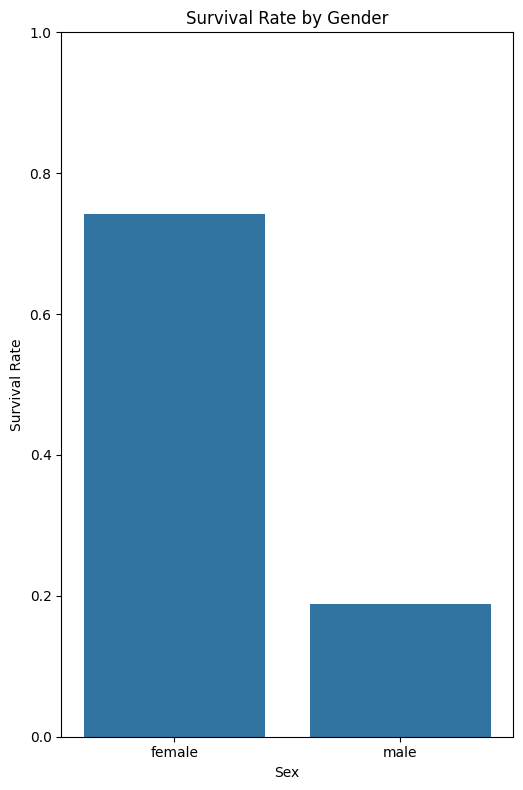

In [106]:
plt.figure(figsize= (10,8))
plt.subplot(1,2,1)
sns.barplot(x = survival_gender.index, y = survival_gender.values)
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Gender')
plt.ylim(0,1)


plt.tight_layout()
plt.show()

Problem 5: Survival Rate by Gender and Embarkation Port

In [107]:
survival_port = titanic_df.groupby(['Sex', 'Embarked'])['Survived'].mean().unstack()
# print("Survival Rate by Gender and Embarkation Port: ")
# print(survival_port)

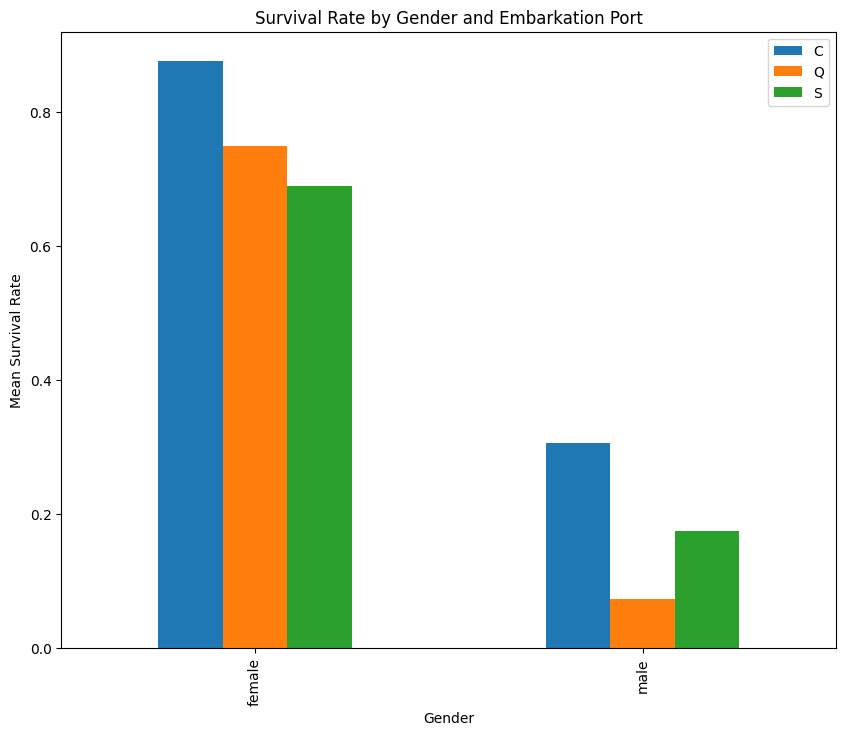

In [108]:
survival_port.plot(kind = 'bar', figsize = (10,8))
plt.xlabel('Gender')
plt.ylabel('Mean Survival Rate')
plt.title("Survival Rate by Gender and Embarkation Port")
plt.legend(['C', 'Q', 'S'])
